In [1]:
from milcapy import SystemModel

In [2]:
# definimos parametros:
h = 2.5  # altura
b = 2
a = 1

In [3]:
# crear el modelo estructural
portal = SystemModel()

In [4]:
# definicion de materiales
Ec = 2e6  # modulo de elasticidad concreto
nu_c = 0.2  # relacion de poisson concreto
gamma_c = 2.4  # peso especifico concreto
Es = 2e11  # modulo de elasticidad acero
nu_s = 0.3  # relacion de poisson acero
gamma_s = 7.85  # peso especifico acero


# agregamos al modelo
portal.add_material('concreto', Ec, nu_c, gamma_c)
portal.add_material('acero', Es, nu_s, gamma_s)

In [5]:
# definicion de secciones
hvc = 0.4  # altura viga-columna
bvc = 0.4  # base viga-columna
d = 0.1  # diametro arriostre

# agregamos secciones al modelo
portal.add_rectangular_section('marco', 'concreto', bvc, hvc)
portal.add_circular_section('arriostre', 'acero', d)

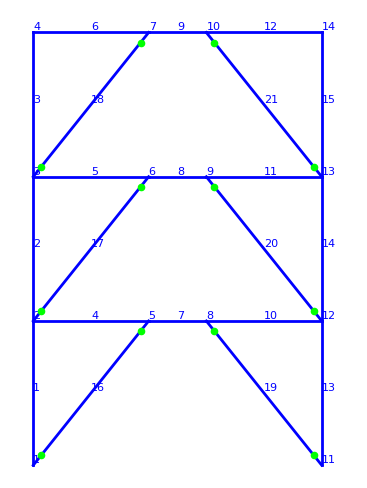


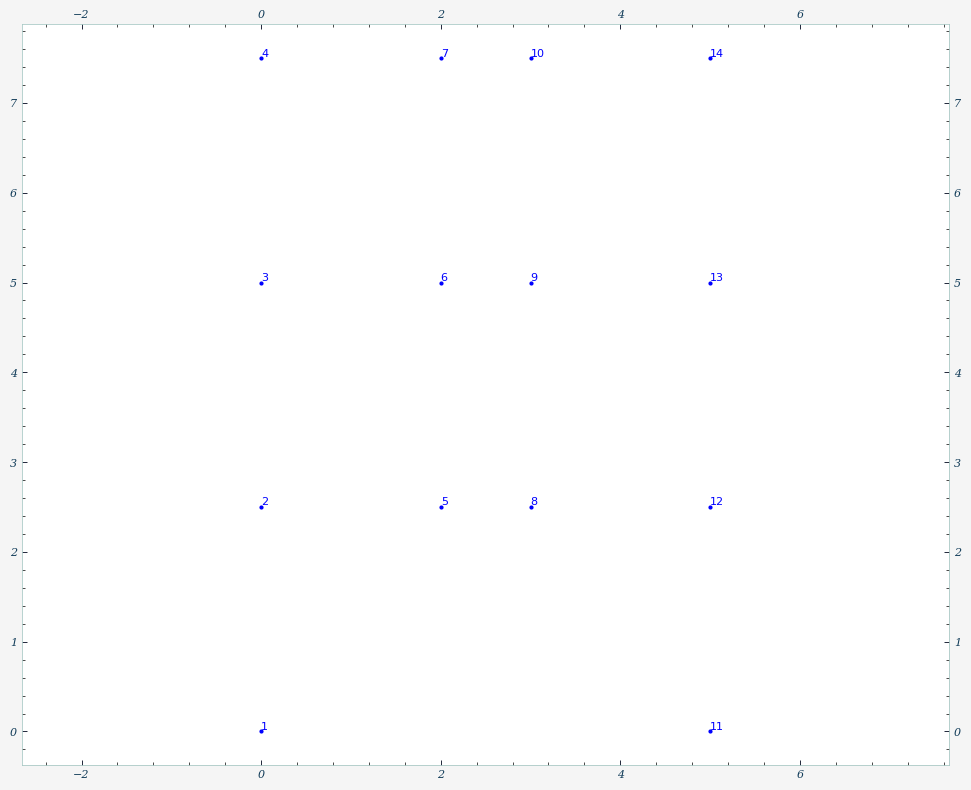

In [6]:
portal.add_node(1, 0, 0)
portal.add_node(2, 0, h)
portal.add_node(3, 0, 2*h)
portal.add_node(4, 0, 3*h)
portal.add_node(5, b, h)
portal.add_node(6, b, 2*h)
portal.add_node(7, b, 3*h)
portal.add_node(8, b+a, h)
portal.add_node(9, b+a, 2*h)
portal.add_node(10, b+a, 3*h)
portal.add_node(11, 2*b+a, 0)
portal.add_node(12, 2*b+a, h)
portal.add_node(13, 2*b+a, 2*h)
portal.add_node(14, 2*b+a, 3*h)
portal.plot_model()

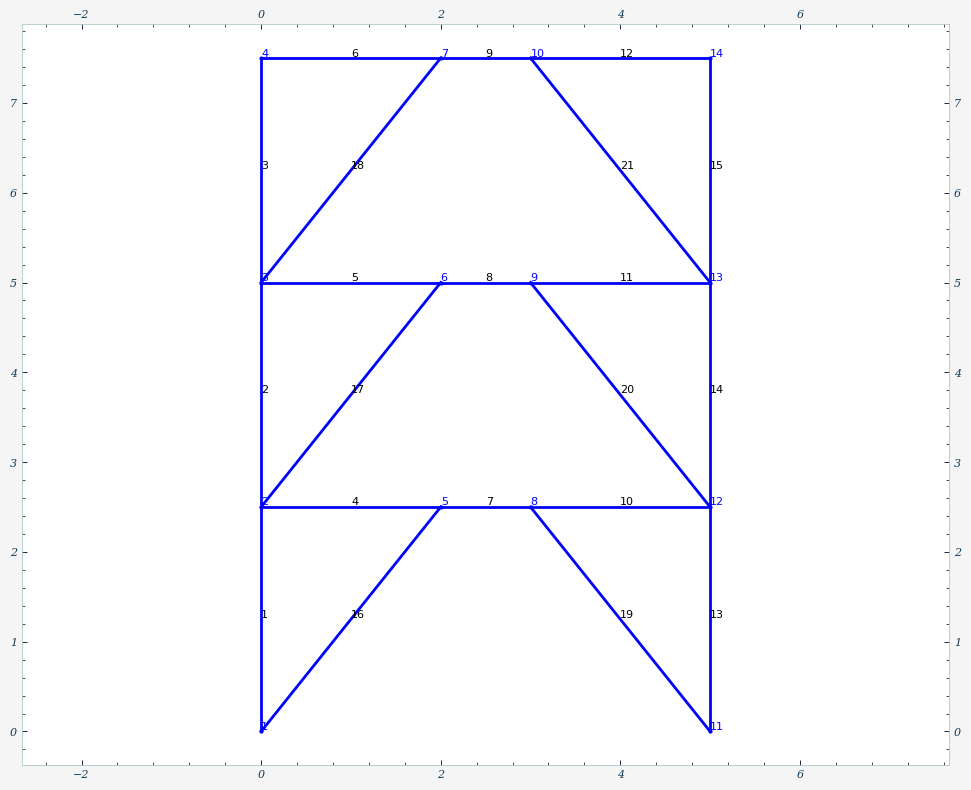

In [ ]:
# agregamos los miembros estructurales del portico

portal.add_elastic_timoshenko_beam(1, 1, 2, 'marco')
portal.add_elastic_timoshenko_beam(2, 2, 3, 'marco')
portal.add_elastic_timoshenko_beam(3, 3, 4, 'marco')
portal.add_elastic_timoshenko_beam(4, 2, 5, 'marco')
portal.add_elastic_timoshenko_beam(5, 3, 6, 'marco')
portal.add_elastic_timoshenko_beam(6, 4, 7, 'marco')
portal.add_elastic_timoshenko_beam(7, 5, 8, 'marco')
portal.add_elastic_timoshenko_beam(8, 6, 9, 'marco')
portal.add_elastic_timoshenko_beam(9, 7, 10, 'marco')
portal.add_elastic_timoshenko_beam(10, 8, 12, 'marco')
portal.add_elastic_timoshenko_beam(11, 9, 13, 'marco')
portal.add_elastic_timoshenko_beam(12, 10, 14, 'marco')
portal.add_elastic_timoshenko_beam(13, 11, 12, 'marco')
portal.add_elastic_timoshenko_beam(14, 12, 13, 'marco')
portal.add_elastic_timoshenko_beam(15, 13, 14, 'marco')

portal.add_elastic_timoshenko_beam(16, 1, 5, 'arriostre')
portal.add_elastic_timoshenko_beam(17, 2, 6, 'arriostre')
portal.add_elastic_timoshenko_beam(18, 3, 7, 'arriostre')
portal.add_elastic_timoshenko_beam(19, 8, 11, 'arriostre')
portal.add_elastic_timoshenko_beam(20, 9, 12, 'arriostre')
portal.add_elastic_timoshenko_beam(21, 10, 13, 'arriostre')
portal.plot_model()

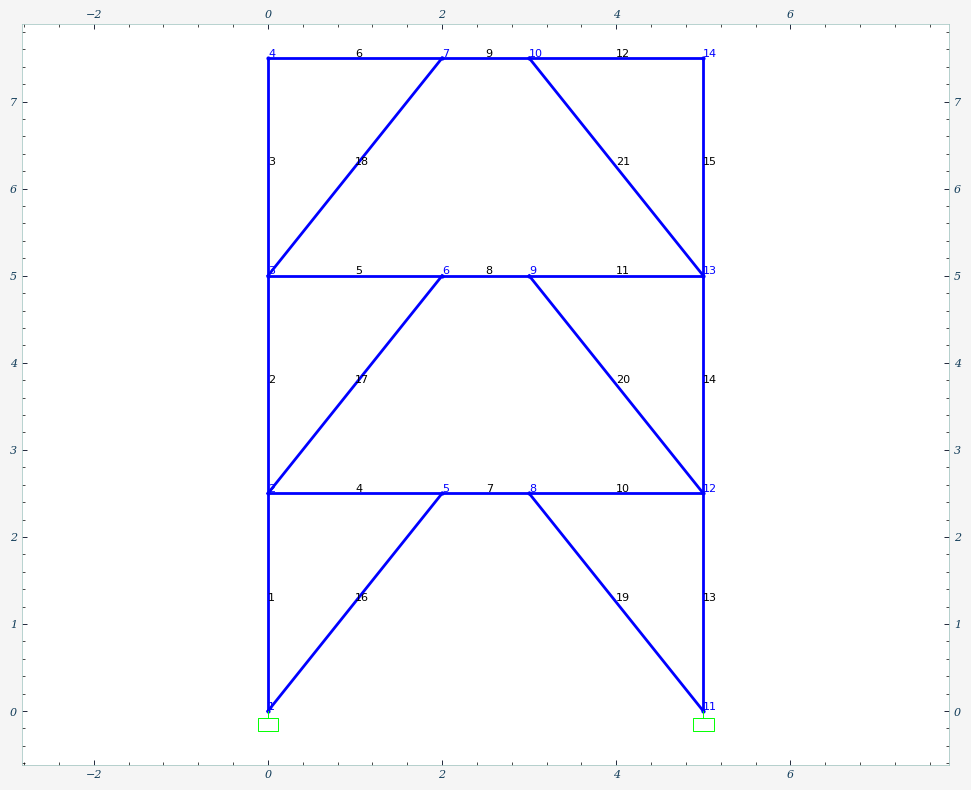

In [13]:
# agregamos las restricciones
portal.add_restraint(1, *(True, True, True))
portal.add_restraint(11, *(True, True, True))
portal.plot_model()

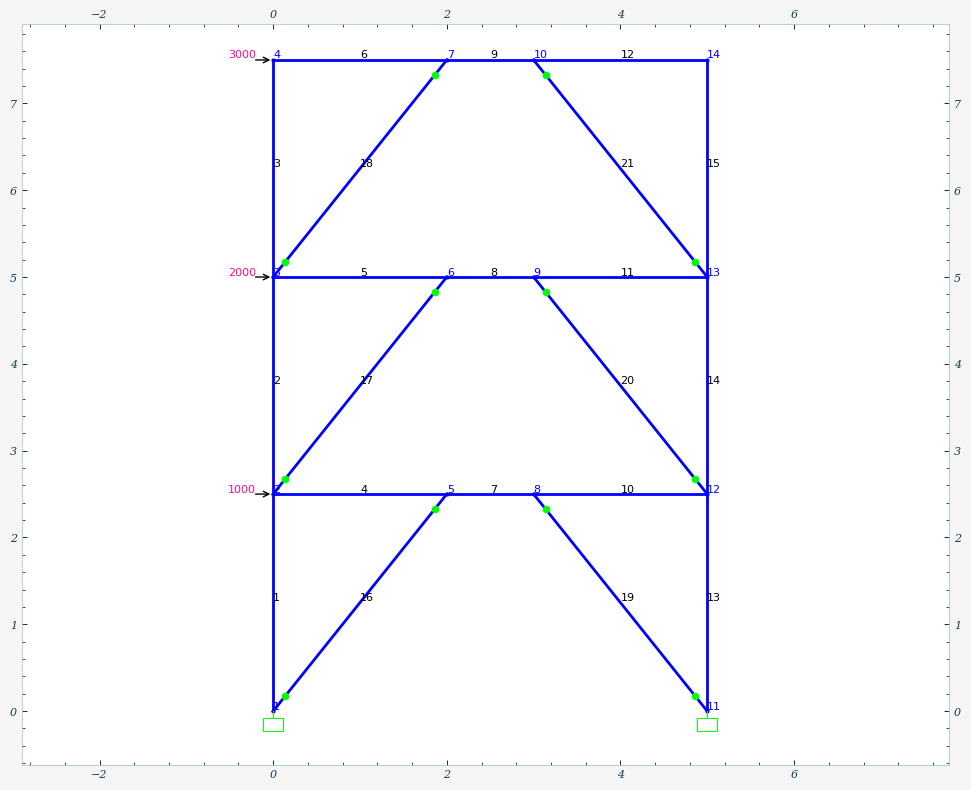

In [ ]:
# creamos un patron de carga y agregamos la carga
portal.add_load_pattern('carga')
portal.add_self_weight('carga', 1)
for ide in range(16, 22):
    portal.set_no_weight('carga', ide)
    portal.add_releases(ide, mi=True, mj=True)

portal.add_point_load(2, 'carga', 1000)
portal.add_point_load(3, 'carga', 2000)
portal.add_point_load(4, 'carga', 3000)
portal.plot_model('carga')

In [17]:
# resolvcemos el modelo
portal.solve()

Tiempo de solucion: 0.0156710147857666 para el Load Pattern: carga


{'carga': <milcapy.core.results.Results at 0x2498d5e1390>}